## Método de Gauss-Newton

1. **Modelo y Residuo**

El modelo no lineal que se desea ajustar es:

$$
y = f(x,θ)= \theta_0 \cdot e^{\theta_1 x}
$$
Donde:


*   $x$ son las entradas de los datos.
*   $y$ son las salidas observadas.
*   $\theta_0$ y $\theta_1$ parámetros del modelo a ajustar.

El residuo es:

$$
r(\theta) = y - f(x, \theta)
$$

2. **Cálculo de la Jacobiana**
La siguiente etapa es calcular la Jacobiana de los residuos con respecto a los parámetros del modelo. La Jacobiana se define como la matriz de derivadas parciales de los residuos
$𝑟(𝜃)$ respecto a cada uno de los parámetros
$𝜃$.
  Las derivadas parciales de los residuos con respecto a los parámetros $( \theta_0 )$ y $( \theta_1 )$ son:

- Derivada respecto a $(\theta_0 )$:
$$
\frac{\partial r(\theta)}{\partial \theta_0} = e^{\theta_1 x}
$$

- Derivada respecto a $( \theta_1 )$:


$$\frac{\partial r(\theta)}{\partial \theta_1} = \theta_0 \cdot x \cdot e^{\theta_1 x}
$$

La Jacobiana es entonces:

$$
J(\theta) =
\begin{bmatrix}
e^{\theta_1 x_1} & x_1 \cdot \theta_0 \cdot e^{\theta_1 x_1} \\
e^{\theta_1 x_2} & x_2 \cdot \theta_0 \cdot e^{\theta_1 x_2} \\
\vdots & \vdots \\
e^{\theta_1 x_n} & x_n \cdot \theta_0 \cdot e^{\theta_1 x_n}
\end{bmatrix}
$$

3. **Fórmula de Actualización de los Parámetros**

La actualización de los parámetros se realiza con la fórmula:

$$
\theta_{k+1} = \theta_k - (J(\theta_k)^T J(\theta_k))^{-1} J(\theta_k)^T r(\theta_k)
$$
Donde:


*   $\theta_k$ es el vector de parámetros en la iteración $k$
*   $J(\theta_k)$ es la jacobiana evaluada en $\theta_k$
*   $r(\theta_k)$ es el residuo evaluado en $\theta_k$
*   $J(\theta_k)$ es la tranpuesta de la Jacobiana
*   $(J(\theta_k)^TJ(\theta_k))^{-1}$ es la matriz inversa de $J(\theta_k)^TJ(\theta_k)$

4. **Criterio de Convergencia**

El algoritmo se detiene cuando:

$$
\| \theta_{k+1} - \theta_k \| < \text{tolerancia}
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función no lineal que queremos ajustar (por ejemplo, modelo exponencial)
def model(x, params):
    return params[0] * np.exp(params[1] * x)

# Residuo (diferencia entre los valores predichos y observados)
def residuals(params, x, y):
    return y - model(x, params)

# Jacobiana de los residuos respecto a los parámetros
def jacobian(x, params):
    J = np.zeros((len(x), len(params)))
    J[:, 0] = np.exp(params[1] * x)  # Derivada respecto a params[0]
    J[:, 1] = params[0] * x * np.exp(params[1] * x)  # Derivada respecto a params[1]
    return J

# Método de Gauss-Newton
def gauss_newton(x, y, params_init, max_iter=100, tol=1e-6):
    params = params_init
    for i in range(max_iter):
        r = residuals(params, x, y)  # Cálculo de los residuos
        J = jacobian(x, params)      # Cálculo de la Jacobiana
        JTJ_inv = np.linalg.inv(J.T @ J)  # Inversa de J^T * J
        params_new = params + JTJ_inv @ J.T @ r  # Actualización de parámetros

        # Verificar la condición de convergencia
        if np.linalg.norm(params_new - params) < tol:
            print(f"Convergencia alcanzada después de {i+1} iteraciones.")
            return params_new
        params = params_new
    return params

# Datos de ejemplo
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.1, 4.5, 7.8, 12.0, 18.5])

# Estimación inicial de los parámetros
params_initial = np.array([1, 0.5])

# Llamada al método de Gauss-Newton
params_final = gauss_newton(x_data, y_data, params_initial)
print("Parámetros ajustados:", params_final)



Convergencia alcanzada después de 7 iteraciones.
Parámetros ajustados: [1.79883892 0.46847443]


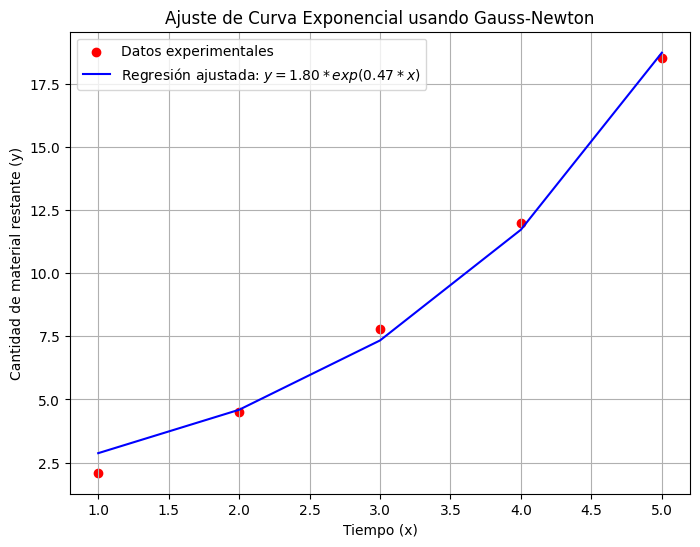

In [ ]:
# Visualización de los resultados
# Valores ajustados por el modelo con los parámetros encontrados
y_fit = model(x_data, params_final)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')  # Datos experimentales
plt.plot(x_data, y_fit, label=f'Regresión ajustada: $y = {params_final[0]:.2f} * exp({params_final[1]:.2f} * x)$', color='blue')  # Curva ajustada
plt.xlabel('Tiempo (x)')
plt.ylabel('Cantidad de material restante (y)')
plt.title('Ajuste de Curva Exponencial usando Gauss-Newton')
plt.legend()
plt.grid(True)
plt.show()

# PROBLEMAS APLICADOS A LA REALIDAD

## Problema 1: Ajuste de Curva de Crecimiento Poblacional

Supongamos que estamos analizando el crecimiento de una población de bacterias en un ambiente controlado. Sabemos que el número de bacterias sigue un comportamiento exponencial, es decir, el número de bacterias $(y)$ en función del tiempo $(x)$ está dado por la ecuación:

$$
y = \theta_0 \cdot e^{\theta_1 x}
$$

Donde:
- $( y )$ es el número de bacterias.
- $( x )$ es el tiempo transcurrido (en horas).
- $( \theta_0 )$ es el número inicial de bacterias.
- $( \theta_1 )$ es la tasa de crecimiento de la población.

Queremos ajustar este modelo a los datos experimentales observados.

### Datos experimentales:
$$
x = [0, 1, 2, 3, 4]
$$
$$
y = [1.0, 2.5, 5.8, 12.1, 23.9]
$$

Utilizaremos el Método de Gauss-Newton para estimar los parámetros $(\theta_0)$ y $(\theta_1)$.


Convergencia alcanzada después de 8 iteraciones.
Parámetros ajustados: [1.37525391 0.71511362]


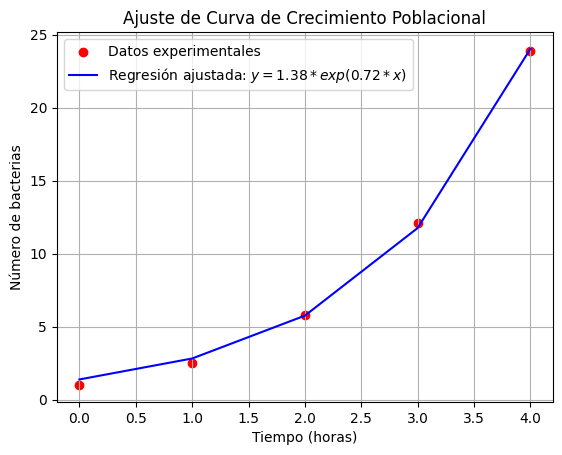

In [ ]:


# Datos experimentales
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([1.0, 2.5, 5.8, 12.1, 23.9])

# Estimación inicial de los parámetros
params_initial = np.array([1, 0.5])

# Llamada al método de Gauss-Newton
params_final = gauss_newton(x_data, y_data, params_initial)
print("Parámetros ajustados:", params_final)

# Visualización
y_fit = model(x_data, params_final)
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')
plt.plot(x_data, y_fit, label=f'Regresión ajustada: $y = {params_final[0]:.2f} * exp({params_final[1]:.2f} * x)$', color='blue')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de bacterias')
plt.title('Ajuste de Curva de Crecimiento Poblacional')
plt.legend()
plt.grid(True)
plt.show()

## Problema 2: Ajuste de Curva de Enfriamiento de un Cuerpo

Consideremos un objeto que se enfría en un ambiente con temperatura constante. La temperatura $(T)$ del objeto en función del tiempo $(t)$ sigue un modelo exponencial de la forma:

$$
T(t) = T_0 \cdot e^{-\lambda t} + T_{\infty}
$$

Donde:
- $(T_0)$ es la temperatura inicial del objeto.
- $(\lambda)$ es la tasa de enfriamiento.
- $(T_{\infty})$ es la temperatura ambiente, que es constante.

Queremos ajustar este modelo a los datos experimentales observados.

### Datos experimentales:
$$
t = [0, 1, 2, 3, 4, 5]
$$
$$
T = [90, 75, 60, 50, 42, 35]
$$

Usaremos el Método de Gauss-Newton para estimar los parámetros $(T_0), (\lambda)$ y $(T_{\infty})$.


Parámetros ajustados: [  80.21809079 3205.10831508    5.37071668]


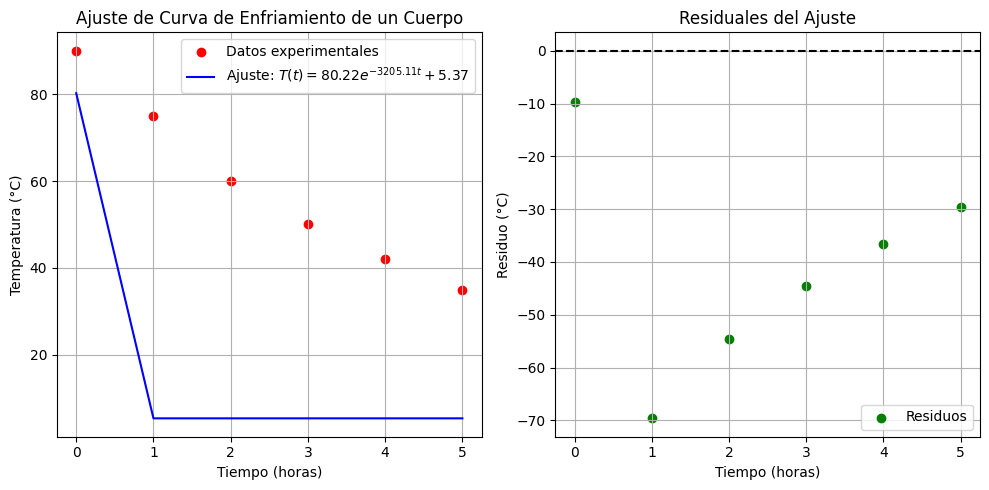

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Modelo de enfriamiento exponencial
def model(t, params):
    T_0, lambda_val, T_infinity = params
    return T_infinity + (T_0 - T_infinity) * np.exp(-lambda_val * t)

# Residuo para la regresión no lineal
def residuals(params, t, T):
    return model(t, params) - T

# Jacobiana del modelo
def jacobian(t, params):
    T_0, lambda_val, T_infinity = params
    J = np.zeros((len(t), len(params)))
    J[:, 0] = np.exp(-lambda_val * t)  # Derivada respecto a T_0
    J[:, 1] = (T_0 - T_infinity) * t * np.exp(-lambda_val * t)  # Derivada respecto a lambda
    J[:, 2] = - (T_0 - T_infinity) * np.exp(-lambda_val * t)  # Derivada respecto a T_infinity
    return J

# Método de Gauss-Newton con regularización
def gauss_newton(t, T, params_init, max_iter=100, tol=1e-6, regularization_factor=1e-5):
    params = params_init
    for i in range(max_iter):
        r = residuals(params, t, T)
        J = jacobian(t, params)
        JTJ = J.T @ J
        JTJ += np.eye(JTJ.shape[0]) * regularization_factor  # Regularización
        try:
            JTJ_inv = np.linalg.inv(JTJ)
        except np.linalg.LinAlgError:
            print("La matriz es singular, intentando con una regularización mayor.")
            regularization_factor *= 10  # Aumentar la regularización si hay un error de inversión
            continue

        params_new = params - JTJ_inv @ J.T @ r

        if np.linalg.norm(params_new - params) < tol:
            print(f"Convergencia alcanzada después de {i+1} iteraciones.")
            return params_new
        params = params_new
    return params

# Datos experimentales (cuerpo en enfriamiento)
t_data = np.array([0, 1, 2, 3, 4, 5])
T_data = np.array([90, 75, 60, 50, 42, 35])

# Estimación inicial de los parámetros (ajustados razonablemente)
# Probamos con un valor más pequeño para lambda y valores más cercanos a los datos
params_initial = np.array([80, .8, 20])  # T_0, lambda, T_infinity (ajustados)

# Llamada al método de Gauss-Newton para el modelo no lineal
params_final = gauss_newton(t_data, T_data, params_initial)
if np.any(np.isnan(params_final)):
    print("Error al ajustar los parámetros.")
else:
    print("Parámetros ajustados:", params_final)

    # Visualización
    T_fit = model(t_data, params_final)
    plt.figure(figsize=(10, 5))

    # Gráfico de los datos experimentales y el ajuste
    plt.subplot(1, 2, 1)
    plt.scatter(t_data, T_data, color='red', label='Datos experimentales')
    plt.plot(t_data, T_fit, label=f'Ajuste: $T(t) = {params_final[0]:.2f} e^{{-{params_final[1]:.2f} t}} + {params_final[2]:.2f}$', color='blue')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Ajuste de Curva de Enfriamiento de un Cuerpo')
    plt.legend()
    plt.grid(True)

    # Gráfico de los residuos
    plt.subplot(1, 2, 2)
    residues = residuals(params_final, t_data, T_data)
    plt.scatter(t_data, residues, color='green', label='Residuos')
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Residuo (°C)')
    plt.title('Residuales del Ajuste')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


## Problema 3: Ajuste de Curva de Decaimiento Radiactivo

Consideramos un experimento donde medimos la cantidad de una sustancia radiactiva a lo largo del tiempo. Sabemos que la cantidad de sustancia \(Q\) sigue una ley exponencial:

$$
Q(t) = Q_0 \cdot e^{-\lambda t}
$$
Donde:
- $(Q_0)$ es la cantidad inicial de la sustancia.
- $(\lambda)$ es la tasa de decaimiento.

Queremos ajustar este modelo a los datos experimentales.

### Datos experimentales:
$$
t = [0, 1, 2, 3, 4, 5]
$$
$$
Q = [100, 80, 60, 45, 30, 20]
$$

Usaremos el Método de Gauss-Newton para estimar los parámetros $(Q_0)$ y $(\lambda)$.


Convergencia alcanzada después de 7 iteraciones.
Parámetros ajustados: [102.85412738   0.29041556]


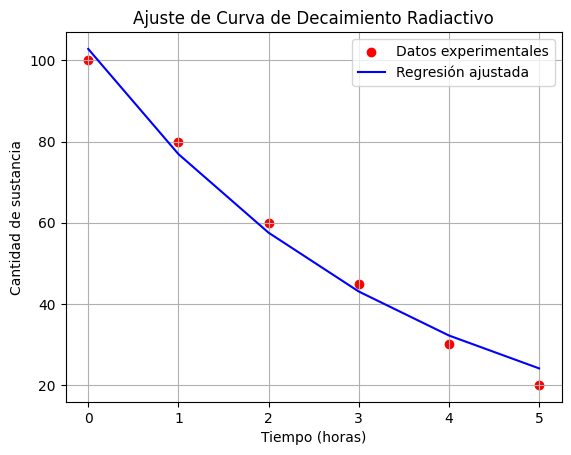

In [ ]:
# Modelo de decaimiento radiactivo
def model(t, params):
    return params[0] * np.exp(-params[1] * t)

# Residuo
def residuals(params, t, Q):
    return Q - model(t, params)

# Jacobiana de los residuos
def jacobian(t, params):
    J = np.zeros((len(t), len(params)))
    J[:, 0] = np.exp(-params[1] * t)  # Derivada respecto a Q_0
    J[:, 1] = -params[0] * t * np.exp(-params[1] * t)  # Derivada respecto a lambda
    return J

# Método de Gauss-Newton
params_initial = np.array([100, 0.2])  # Estimación inicial de los parámetros
params_final = gauss_newton(np.array([0, 1, 2, 3, 4, 5]), np.array([100, 80, 60, 45, 30, 20]), params_initial)
print("Parámetros ajustados:", params_final)

# Visualización
Q_fit = model(np.array([0, 1, 2, 3, 4, 5]), params_final)
plt.scatter([0, 1, 2, 3, 4, 5], [100, 80, 60, 45, 30, 20], color='red', label='Datos experimentales')
plt.plot([0, 1, 2, 3, 4, 5], Q_fit, label=f'Regresión ajustada', color='blue')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Cantidad de sustancia')
plt.title('Ajuste de Curva de Decaimiento Radiactivo')
plt.legend()
plt.grid(True)
plt.show()
